# Learning Objectives
Comparison of clustering algorithms using synthetic datasets: K-means, Hiararchical Clustering, DBSCAN
- [Case1: Non-Spherical Distribution](#Case1:-Non-Spherical-Distribution)
- [Case2: Non-spherical Distribution with Outliers](#Case2:-Non-spherical-Distribution-with-Outliers)
- [Case3: Uneven Cluster Sizes with Outliers](#Case3:-Uneven-Cluster-Sizes-with-Outliers)
- [Case4: Compare All Clustering Algorithms](#Case3:-Compare-All-Clustering-Algorithms)
- [Summary](#Summary)

#### Adapted from 
* https://scikit-learn.org/stable/modules/clustering.html
* https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
import matplotlib.pyplot as plt
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

%matplotlib inline

In [2]:
digits = datasets.load_digits()
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in digits.target_names:
        plt.scatter(
            *X_red[y == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[y == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Case1: Non-Spherical Distribution

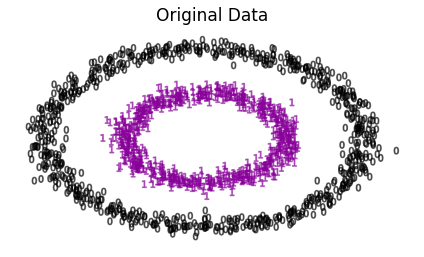

In [47]:
n_samples = 1500
random_state = 170
X_noisy_circles, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
plot_clustering(X_noisy_circles, y, "Original Data")    

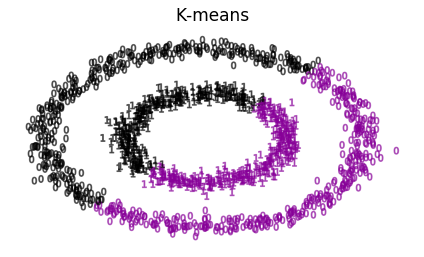

In [48]:
### K-means
km = KMeans(n_clusters=2).fit(X_noisy_circles)
plot_clustering(X_noisy_circles, km.labels_, "K-means")    
plt.show()

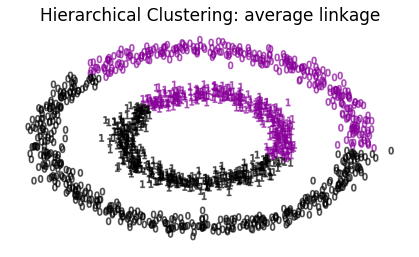

In [49]:
### Hierarchical Clustering
linkage = "average"
clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
clustering.fit(X_noisy_circles)
plot_clustering(X_noisy_circles, clustering.labels_, "Hierarchical Clustering: %s linkage" % linkage)    
plt.show()

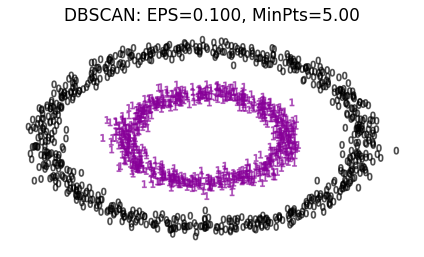

In [59]:
### DBSCAN
from sklearn import metrics

EPS, MinPts = 0.1, 5
db = DBSCAN(eps=EPS, min_samples=MinPts).fit(X_noisy_circles)
labels =  db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plot_clustering(X_noisy_circles, labels, "DBSCAN: EPS=%.3f, MinPts=%.2f" % (EPS,MinPts))    
plt.show()

# Case2: Non-spherical Distribution with Outliers

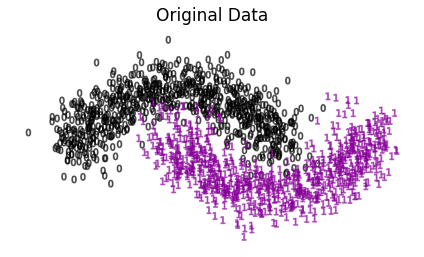

In [39]:
random_state = 1
n_samples = 1500
X_varied, y = datasets.make_moons(n_samples=1500, noise=0.2, random_state=1) 
plot_clustering(X_varied, y, "Original Data")    

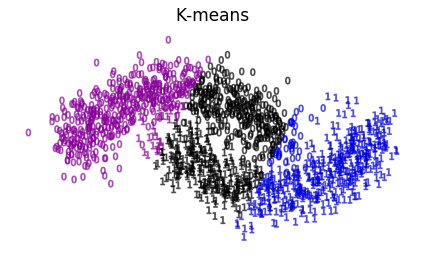

In [43]:
### K-means
km = KMeans(n_clusters=3).fit(X_varied)
plot_clustering(X_varied, km.labels_, "K-means")    
plt.show()

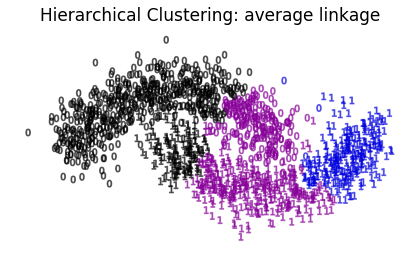

In [44]:
### Hierarchical Clustering
linkage = "average"
clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
clustering.fit(X_varied)
plot_clustering(X_varied, clustering.labels_, "Hierarchical Clustering: %s linkage" % linkage)    
plt.show()

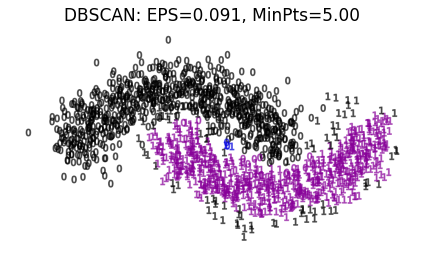

In [45]:
### DBSCAN
min_samples = 5
for eps in np.arange(start=0.001, stop=1, step=0.005):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_varied)
    labels =  db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters_ == 3: 
        EPS, MinPts = eps, min_samples
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_varied)
        labels =  db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        plot_clustering(X_varied, labels, "DBSCAN: EPS=%.3f, MinPts=%.2f" % (EPS,MinPts))    
        plt.show()
        break
#    break

# Case3: Uneven Cluster Sizes with Outliers

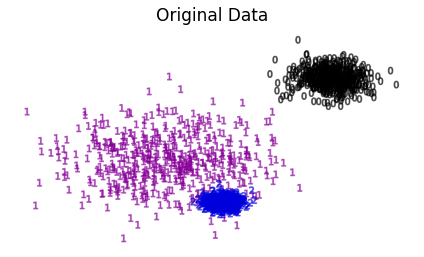

In [63]:
random_state = 1
X_varied, y = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
plot_clustering(X_varied, y, "Original Data")    

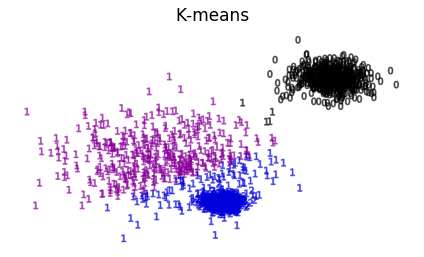

In [64]:
### K-means
km = KMeans(n_clusters=3).fit(X_varied)
plot_clustering(X_varied, km.labels_, "K-means")    
plt.show()

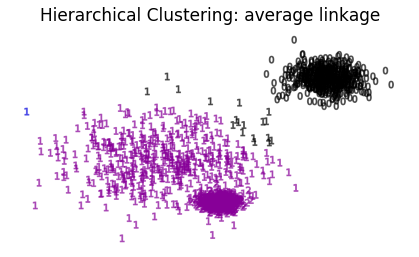

In [65]:
### Hierarchical Clustering
linkage = "average"
clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
clustering.fit(X_varied)
plot_clustering(X_varied, clustering.labels_, "Hierarchical Clustering: %s linkage" % linkage)    
plt.show()

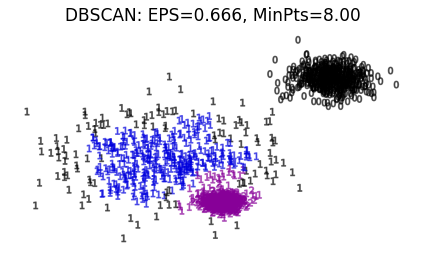

In [66]:
### DBSCAN
EPS, MinPts = 0.666, 8
db = DBSCAN(eps=EPS, min_samples=MinPts).fit(X_varied)
labels =  db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plot_clustering(X_varied, labels, "DBSCAN: EPS=%.3f, MinPts=%.2f" % (EPS,MinPts))    
plt.show()

# Case4: Compare All Clustering Algorithms 

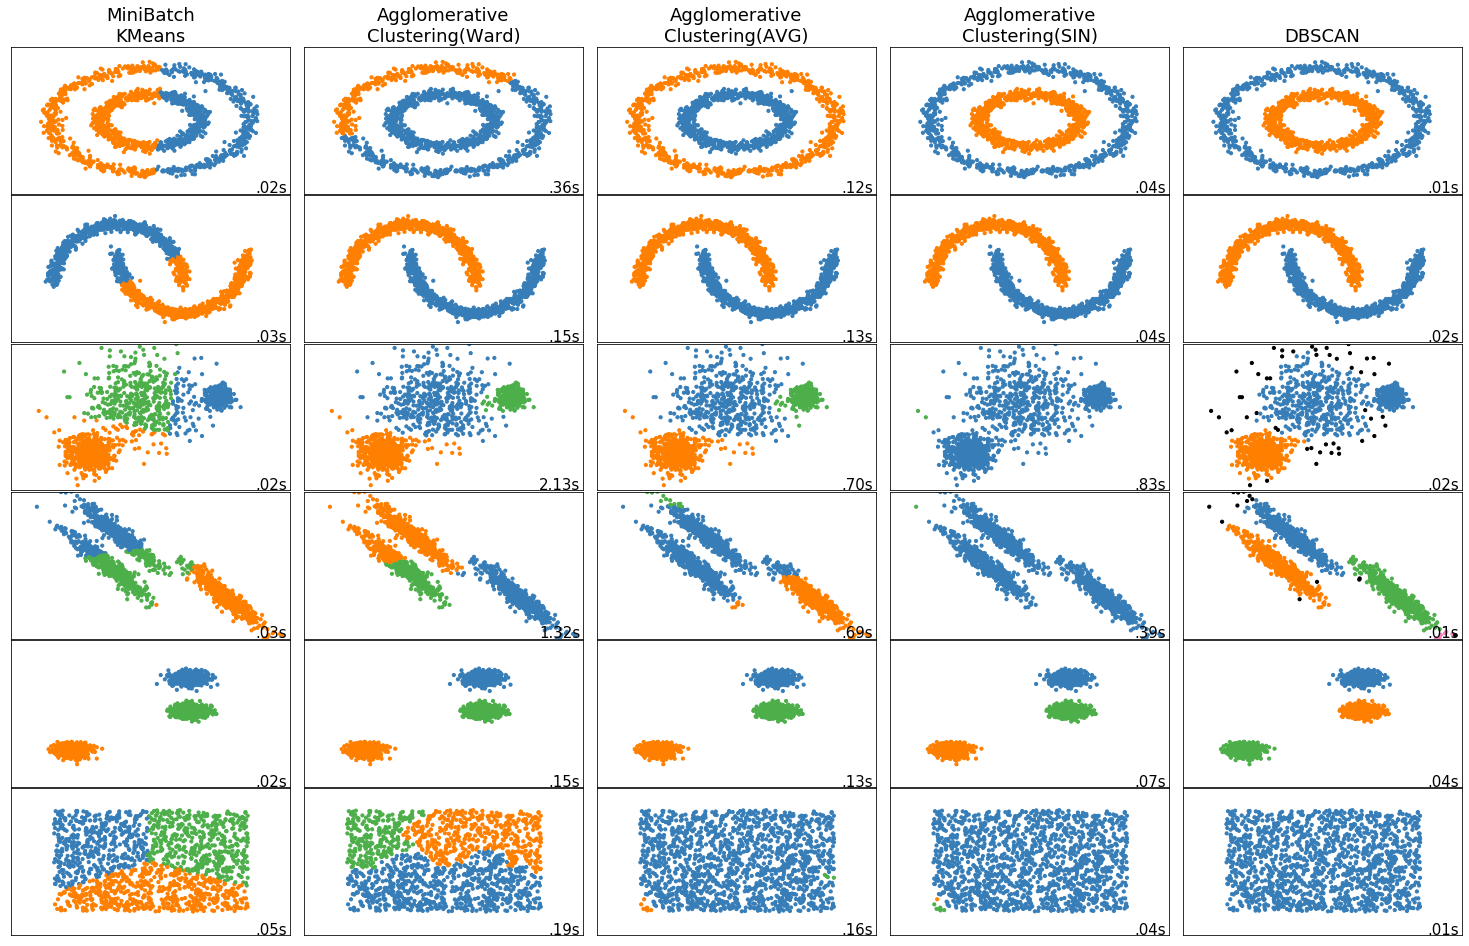

In [30]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )

    dbscan = cluster.DBSCAN(eps=params["eps"])

    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    single_linkage = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single", connectivity=connectivity
    )
    
    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Agglomerative\nClustering(Ward)", ward),
        ("Agglomerative\nClustering(AVG)", average_linkage),
        ("Agglomerative\nClustering(SIN)", single_linkage),
        ("DBSCAN", dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

# Summary

### Advantages of DBSCAN
* DBSCAN does not require one to specify the number of clusters in the data a priori, as opposed to k-means.

* DBSCAN can find arbitrarily shaped clusters.

* DBSCAN has a notion of noise, and is robust to outliers.

* DBSCAN requires just two parameters which can be set by a domain expert, if the data is well understood.

### Disadvantages of DBSCAN
* The quality of DBSCAN depends on the distance measure used. The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε (the maximum radius of the neighborhood from a point).

* DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters. minPts is the minimum number of points required to form a dense region.

* If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.